# ベイズA/Bテスト（二項分布）

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import pymc3
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class bayesian_binomial:
    """
    二項分布のベイズ推定を実行。
    
    Parameters
    ----------
    n_trials: int
        二項分布における試行回数。
        
    n_occurs: int
        二項分布における生起回数。
    """
    
    def __init__(self, n_trials: int, n_occurs: int):
        self.n_trials = n_trials
        self.n_occurs = n_occurs
        
    def posterior_beta(self, prior_a, prior_b):
        """
        二項分布の生起確率を共役事前分布（ベータ分布）で計算する。
        
        Parameters
        ----------
        prior_a: float
            ベータ分布のパラメータ。b以下の値。
            
        prior_b: float
            ベータ分布のパラメータ。a以上の値。
            
        Returns
        -------
        post_beta: sp.stats.beta
            ベータ事後分布オブジェクト。rvs関数によりサンプリング可能。
        """
        post_beta = sp.stats.beta(prior_a+self.n_occurs, prior_b+self.n_trials-self.n_occurs)
        return post_beta
    
    def posterior_beta_online(self):
        """
        事前の知識（ハイパーパラメータ）を利用して
        新しいデータを元に事後分布を更新していく。
        """

In [3]:
visitors_to_A = 1300
visitors_to_B = 1000
conversions_from_A = 120
conversions_from_B = 180

In [4]:
bb_A = bayesian_binomial(visitors_to_A, conversions_from_A).posterior_beta(1, 1)
bb_B = bayesian_binomial(visitors_to_B, conversions_from_B).posterior_beta(1, 1)

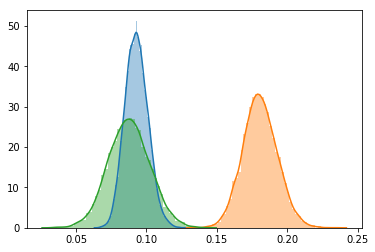

In [5]:
# Bの方が高い
post_beta_A = bb_A.rvs(10000)
post_beta_B = bb_B.rvs(10000)
sns.distplot(post_beta_A, kde=True, rug=False, bins=50) 
sns.distplot(post_beta_B, kde=True, rug=False, bins=50) 
sns.distplot(post_beta_B - post_beta_A, kde=True, rug=False, bins=50) 

0.0877360134037259


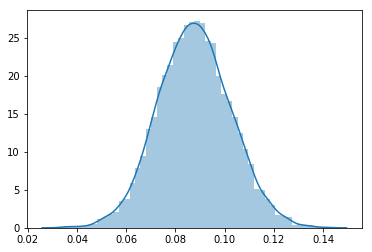

In [6]:
# 平均的にサイトBの方が3.3%ほどAよりコンバージョン率が高い（あまり意味なし）
print((post_beta_B - post_beta_A).mean())
sns.distplot(post_beta_B - post_beta_A, kde=True, rug=False, bins=50)

In [7]:
# ユーザにコンバージョンの意志があるならA

In [8]:
(post_beta_A > post_beta_B).mean()

0.0

In [9]:
# サイトA（訪問者数1300人中120人がコンバージョン）
visitors_to_A = 1300
conversions_from_A = 120

# サイトB（訪問者数1275人中125人がコンバージョン）
visitors_to_B = 1275
conversions_from_B = 125

In [10]:
a = posterior_dist(visitors_to_A, conversions_from_A, 1, 1).rvs(2000)
sns.distplot(a, kde=True, rug=False, bins=10) 

NameError: name 'posterior_dist' is not defined